In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import pathlib
import mapclassify as mc
%matplotlib inline
from datetime import datetime

# Reading data

## Education

In [9]:
education_path = "../dataset/Education/"
education_directory = glob.glob(os.path.join(education_path, "*.csv"))

for file in education_directory:
    
    df = pd.read_csv(file)
    print("File Name : ", file.split("/")[-1])
    
    print("Data : ")
    display(df.head())
    print()

File Name :  Education\2015_16_Districtwise.csv
Data : 


,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,...,21322,26,2594,3489,5315,27,62,23,852,239
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,...,17307,0,1571,4127,5800,210,53,30,1665,360
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,...,5444,31,408,817,3284,886,11,0,2873,40
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,...,12469,18,857,2290,3837,119,45,8,1035,325
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,...,7408,17,855,1688,2584,151,67,5,1101,209



File Name :  Education\2015_16_Districtwise_Metadata.csv
Data : 


,Field Name,Description
0,STATCD,Data_Reported_from: State code
1,DISTCD,Data_Reported_from: District Code
2,STATNAME,Data_Reported_from: State name
3,DISTNAME,Data_Reported_from: District name
4,DISTRICTS,Data_Reported_from: No. of district



File Name :  Education\2015_16_Statewise_Elementary.csv
Data : 


,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,...,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,2015-16,2,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,...,652,36054,3053,38307,6930,6909,6498,5445,6151,2717
2,2015-16,3,PUNJAB,22,146,13197,1780,27704,29.82,10.62,...,2754,88618,14200,56222,23531,42532,9244,8406,30835,7218
3,2015-16,4,CHANDIGARH,1,20,84,20,1055,97.25,11.18,...,117,1994,218,135,419,2066,0,36,1398,0
4,2015-16,5,UTTARAKHAND,13,95,11989,995,10117,21.54,13.14,...,1147,12608,1024,48215,14587,7545,12388,6671,1855,3227



File Name :  Education\2015_16_Statewise_Elementary_Metadata.csv
Data : 


,Field name,Description
0,AC_YEAR,AC_YEAR: AC_YEAR
1,STATCD,Data Reported from: Data Reported from
2,STATNAME,Data Reported from: Data Reported from
3,DISTRICTS,Data Reported from: Data Reported from
4,BLOCKS,Data Reported from: Data Reported from



File Name :  Education\2015_16_Statewise_Secondary.csv
Data : 


,ac_year,statcd,statname,area_sqkm,tot_population,urban_population,grwoth_rate,sexratio,sc_population,st_population,...,tchmed_nr,tchoth_nr,tchse_nr,tchnr_nr,enrc7_py,enrc8_py,enrc9_py,enrc10_py,enr11_py,enr12_py
0,2015-16,1,Jammu And Kashmir,222236.0,12548.93,20.05,23.71,883.0,7.4,11.9,...,0,0,0,0,199954,203537,192567,146066,138963,116187
1,2015-16,2,Himachal Pradesh,55673.0,6856.51,8.69,12.81,974.0,25.2,5.7,...,0,0,0,0,122101,122413,130258,135253,119932,98924
2,2015-16,3,Punjab,50362.0,27704.24,29.82,13.73,893.0,31.9,0.0,...,0,0,0,0,481982,473349,451412,426034,351639,342835
3,2015-16,4,Chandigarh,114.0,1054.69,76.66,17.10,818.0,18.9,0.0,...,0,0,0,0,21344,21321,21545,16708,20948,17943
4,2015-16,5,Uttarakhand,53483.0,10116.75,21.54,19.17,963.0,18.8,2.9,...,0,0,0,0,193393,193890,197590,200769,150799,162100



File Name :  Education\2015_16_Statewise_Secondary_Metadata.csv
Data : 


,Field name,Description
0,statcd,State code
1,ac_year,Academic year
2,statname,State name
3,area_sqkm,Area
4,tot_population,Total Population


## GDP

In [2]:
gdp_path = "../dataset/GDP/"
gdp_directory = glob.glob(os.path.join(gdp_path, "*.csv"))

for file in gdp_directory:
    
    df = pd.read_csv(file)
    print("File Name : ", file.split("/")[-1])
    
    print("Data : ")
    display(df.head())
    print()

File Name :  GDP\data.csv
Data : 


,State Name,Geometry,NSDP Per Capita (Nominal)1996-97,NSDP Per Capita (Nominal)2000-01,NSDP Per Capita (Nominal)2005-06,NSDP Per Capita (Nominal)2010-11,NSDP Per Capita (Nominal)2011-12,NSDP Per Capita (Nominal)2012-13,NSDP Per Capita (Nominal)2013-14,NSDP Per Capita (Nominal)2014-15,NSDP Per Capita (Nominal)2015-16,NSDP Per Capita (Nominal)2016-17,NSDP Per Capita (Nominal)2017-18,NSDP Per Capita (Nominal)2018-19,NSDP Per Capita (Nominal)2019-20,Growth from 2000 to 2010,Growth from 2010 to 2019
0,Arunachal Pradesh,"POLYGON ((96.16260946675357 29.38078474502004,...","₹ 10,816","₹ 15,260","₹ 28,171","₹ 60,961","₹ 73,068","₹ 81,353","₹ 91,809","₹ 1,10,929","₹ 1,12,046","₹ 1,17,344","₹ 1,30,197","₹ 1,39,588","₹ 1,69,742",299%,178.0 %
1,Assam,MULTIPOLYGON (((89.74322932956994 26.303620341...,"₹ 7,394","₹ 12,803","₹ 18,396","₹ 33,087","₹ 41,142","₹ 44,599","₹ 49,734","₹ 52,895","₹ 60,817","₹ 66,330","₹ 74,184","₹ 82,078","₹ 86,801",158%,162.0 %
2,Bihar,MULTIPOLYGON (((84.50719832504274 24.263231032...,"₹ 4,001","₹ 6,415","₹ 8,223","₹ 19,111","₹ 21,750","₹ 24,487","₹ 26,948","₹ 28,671","₹ 30,404","₹ 34,156","₹ 38,631","₹ 43,822","₹ 46,292",197%,142.0 %
3,Chhattisgarh,"POLYGON ((83.33531747931829 24.09885072448139,...","₹ 8,353","₹ 10,744","₹ 20,117","₹ 41,165","₹ 55,177","₹ 60,849","₹ 69,880","₹ 72,936","₹ 73,590","₹ 81,808","₹ 89,813","₹ 96,887","₹ 1,04,989",283%,155.0 %
4,Goa,MULTIPOLYGON (((74.11917887850251 14.753440750...,"₹ 26,418","₹ 43,735","₹ 84,721","₹ 1,68,024","₹ 2,59,444","₹ 2,34,354","₹ 2,15,776","₹ 2,89,185","₹ 3,34,575","₹ 3,82,140","₹ 4,22,155","₹ 4,58,304","₹ 4,35,959",284%,159.0 %


## Unemployment

In [7]:
unemployment_path = "../dataset/Unemployment/"
unemployment_directory = glob.glob(os.path.join(unemployment_path, "*.csv"))

for file in unemployment_directory:
    
    df = pd.read_csv(file)
    print("File Name : ", file.split("/")[-1])
    
    print("Data : ")
    display(df.head())
    print()

File Name :  Unemployment\Unemployment in India.csv
Data : 


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural



File Name :  Unemployment\Unemployment_Rate_upto_11_2020.csv
Data : 


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### Loading shape file

In [3]:
india_shapefile = '../dataset/Shape files/India-State-and-Country-Shapefile-Updated-Jan-2020/India_State_Boundary.shp'
map_df = gpd.read_file(india_shapefile)
map_df.head()

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."


In [4]:
map_df.at[13, 'State_Name'] = 'Tamil Nadu'
map_df.at[14, 'State_Name'] = 'Chhattisgarh'
map_df.at[15, 'State_Name'] = 'Telangana'

### Visualizing geospatial data for GDP

In [5]:
def get_state_wise_gdp(year, map_df):
    
    gdp_path = "../dataset/GDP/"
    gdp_data = pd.read_csv(gdp_path + 'data.csv')
    
    col = "NSDP Per Capita (Nominal)"
    gdp_col = col+year
    gdp_data = gdp_data[['State Name', gdp_col]]
    gdp_data = gdp_data.rename(columns = {gdp_col : "GDP in Rs", "State Name" : "State_Name"})
    
    gdp_data['GDP in Rs'] = gdp_data['GDP in Rs'].apply(lambda x : str(x[1:].replace(',',''))).astype(str).astype(int)
    
    gdp_data_merged = map_df.merge(gdp_data, on = 'State_Name', how = 'left').fillna(0)
    
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.axis('off')
    ax.set_title('State-wise GDP ' + year +' data',
                 fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig = gdp_data_merged.plot(column='GDP in Rs', cmap='YlOrRd', linewidth=0.8,edgecolor='0.2',ax=ax,legend=True) # alternative cmap = 'RdYlGn', 'YlOrRd'

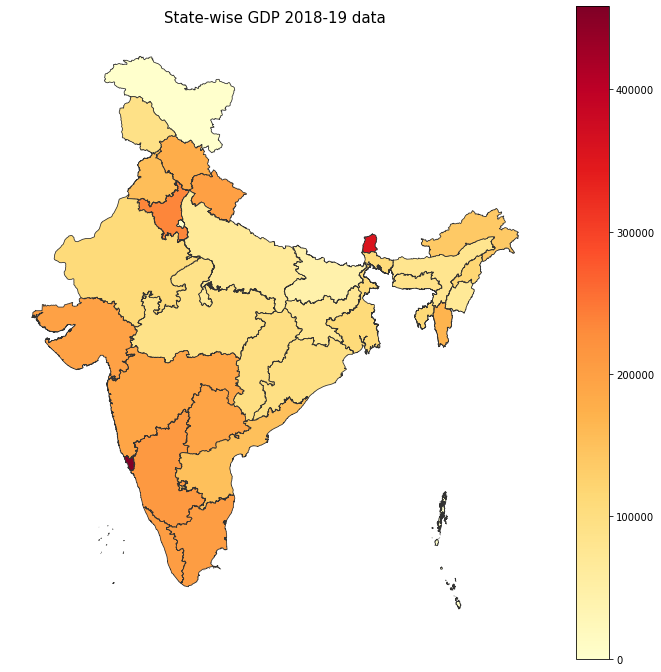

In [6]:
get_state_wise_gdp("2018-19", map_df)

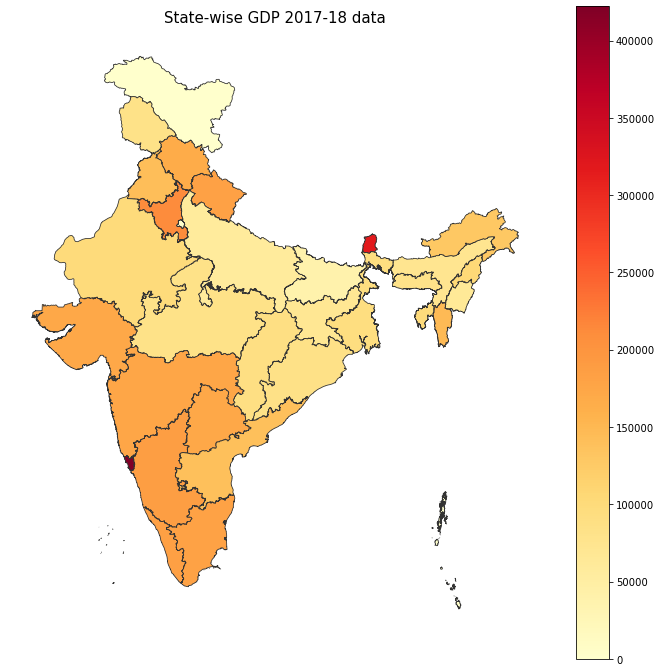

In [96]:
get_state_wise_gdp("2017-18", map_df)

### Visualizing and Comparing unemployment rates in India before and after covid

In [179]:
unemployment_path = "../dataset/Unemployment/"

unemployment_df = pd.read_csv(unemployment_path + "Unemployment in India.csv").dropna()
unemployment_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [181]:
def get_unemployment_rate(year, unemployment_df, map_df):
    unemployment_df['Year'] = pd.to_datetime(unemployment_df[' Date']).dt.strftime('%Y')
    unemployment_year_df = unemployment_df[unemployment_df['Year'] == year]
    
    unemployment_year_grp = unemployment_year_df.groupby(['Region'], as_index = False).agg({' Estimated Unemployment Rate (%)' : 'mean'})
    unemployment_year_grouped = map_df.merge(unemployment_year_grp, how = 'left', left_on = 'State_Name', right_on = 'Region').fillna(0)
    
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.axis('off')
    ax.set_title('State-wise Unemployment Rate (%) '+ year + ' data',
                 fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig = unemployment_year_grouped.plot(column=' Estimated Unemployment Rate (%)', cmap='YlOrRd', linewidth=0.8, edgecolor='0.2', ax=ax, vmin = 0, vmax = 30, legend=True)

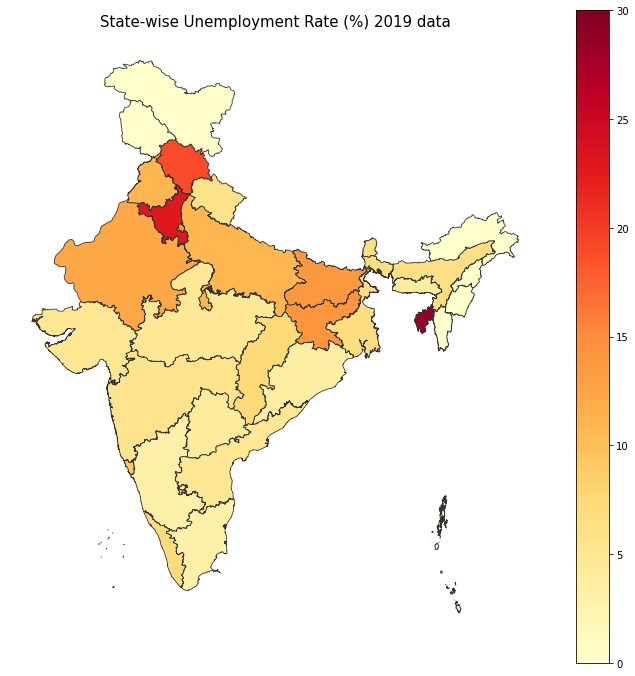

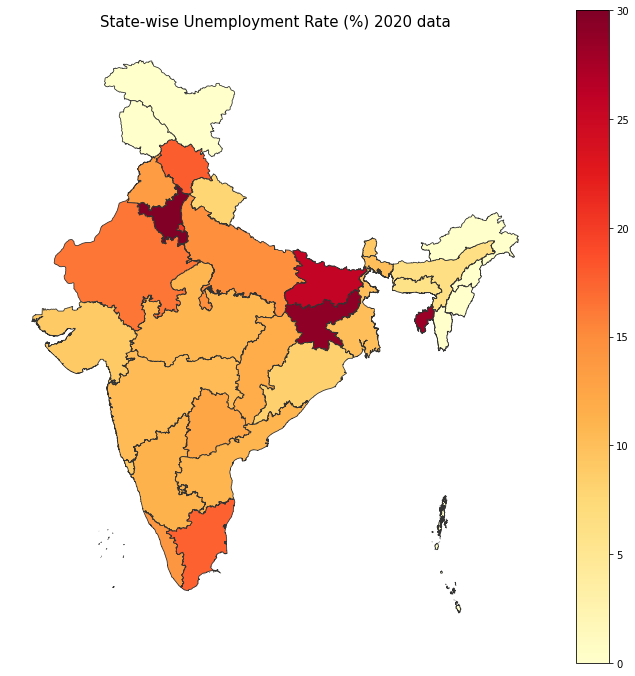

In [182]:
get_unemployment_rate('2019', unemployment_df, map_df)
get_unemployment_rate('2020', unemployment_df, map_df)

In [185]:
def get_labour_participation_rate(year, unemployment_df, map_df):
    unemployment_df['Year'] = pd.to_datetime(unemployment_df[' Date']).dt.strftime('%Y')
    unemployment_year_df = unemployment_df[unemployment_df['Year'] == year]
    
    unemployment_year_grp = unemployment_year_df.groupby(['Region'], as_index = False).agg({' Estimated Labour Participation Rate (%)' : 'mean'})
    unemployment_year_grouped = map_df.merge(unemployment_year_grp, how = 'left', left_on = 'State_Name', right_on = 'Region').fillna(0)
    
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.axis('off')
    ax.set_title('State-wise Labour Participation Rate (%) '+ year + ' data',
                 fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig = unemployment_year_grouped.plot(column=' Estimated Labour Participation Rate (%)', cmap='YlOrRd', linewidth=0.8, edgecolor='0.2', ax=ax, vmin = 35, vmax = 50, legend=True)

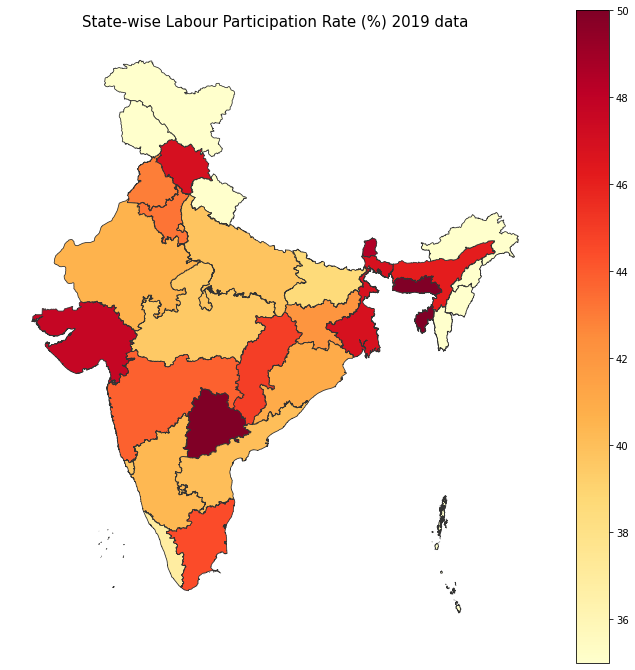

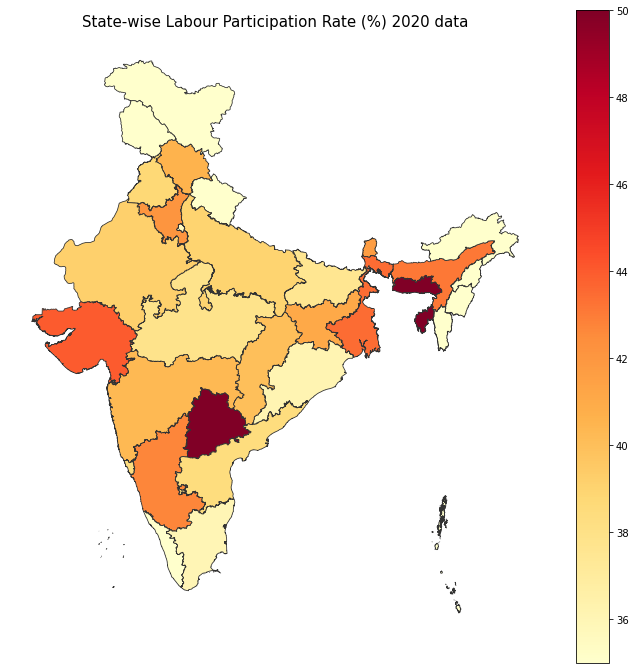

In [186]:
get_labour_participation_rate('2019', unemployment_df, map_df)
get_labour_participation_rate('2020', unemployment_df, map_df)